<a href="https://colab.research.google.com/github/arshraj1061/Music-Therapy/blob/main/Backend/ML/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Load and clean data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mxmh_survey_results.csv to mxmh_survey_results (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['mxmh_survey_results.csv']))


In [ ]:
print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [ ]:
df.columns.sort_values()

Index(['Age', 'Anxiety', 'BPM', 'Composer', 'Depression', 'Exploratory',
       'Fav genre', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Hours per day', 'Insomnia', 'Instrumentalist', 'Music effects', 'OCD',
       'Permissions', 'Primary streaming service', 'Timestamp',
       'While working'],
      dtype='object')

In [ ]:
df.dtypes


Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [ ]:
# check for missing values
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

**Exploratory Data Analysis**

Part 1: Music listener profiles

<ipython-input-35-04d4e1cee7a5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['Age'], kde=False, bins=50)


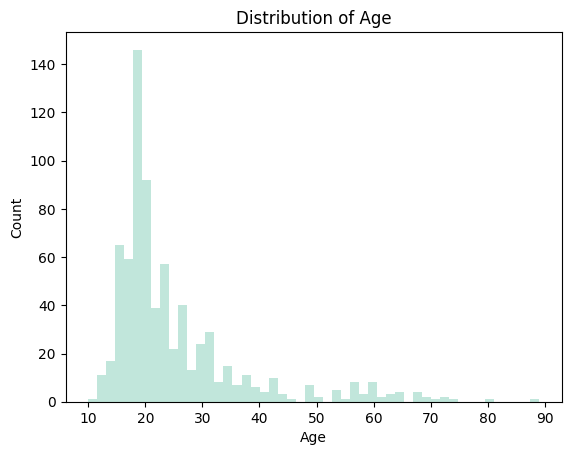

In [ ]:
# plot the distribution of Age
g = sns.distplot(df['Age'], kde=False, bins=50)
g.set_title('Distribution of Age')
g.set_xlabel('Age')
g.set_ylabel('Count')
plt.show()

<ipython-input-36-959d6abc2159>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['Hours per day'], kde=False, bins=24)


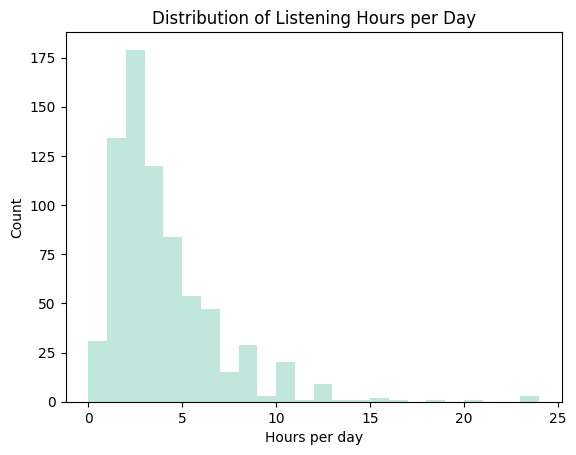

In [ ]:
#  distribution of listening hours per week
g = sns.distplot(df['Hours per day'], kde=False, bins=24)
g.set_title('Distribution of Listening Hours per Day')
g.set_xlabel('Hours per day')
g.set_ylabel('Count')
plt.show()

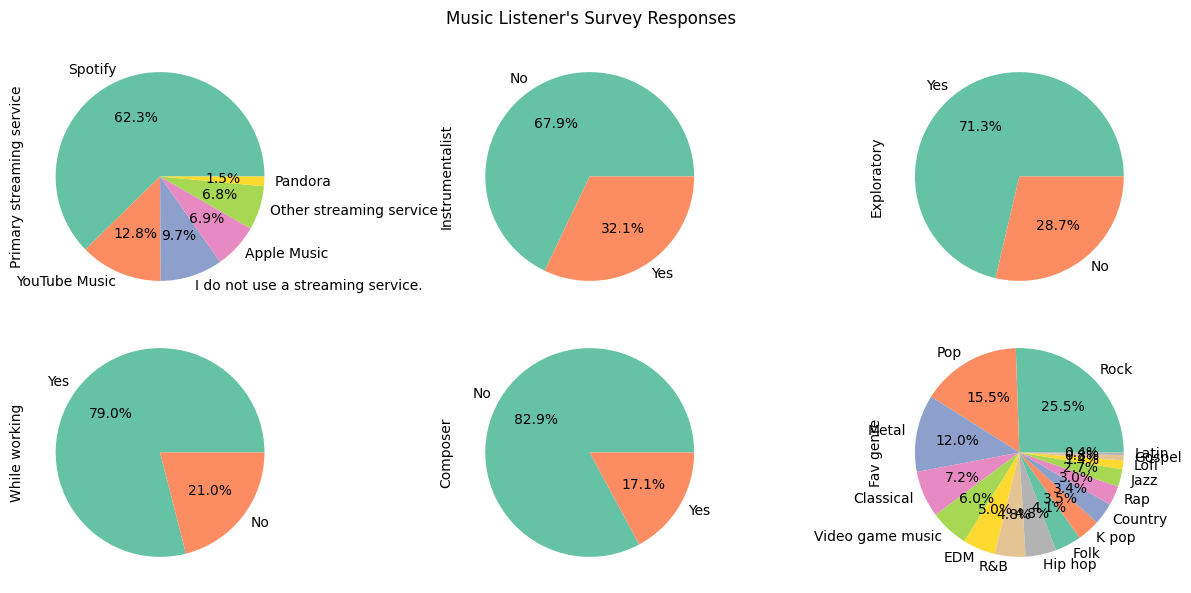

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)

# pie chart for proportion of primary streaming service
df['Primary streaming service'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 0])

# pie chart for proportion of listening to music while working
df['While working'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 0])

# pie chart for proportion of whether listener is a instrumentalist
df['Instrumentalist'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 1])

# pie chart for proportion of whether listener is a composer
df['Composer'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 1])

# pie chart for proportion of whether listener explores new music
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0, 2])

# pie chart for proportion of favourite genre
df['Fav genre'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1, 2])

plt.suptitle("Music Listener's Survey Responses")
plt.tight_layout()
plt.show()

Part 2: Music genres


<ipython-input-38-468a50ed1220>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_genre['Genre'] = df_genre['Genre'].str.replace('Frequency ', '').str.replace('[', '').str.replace(']', '')


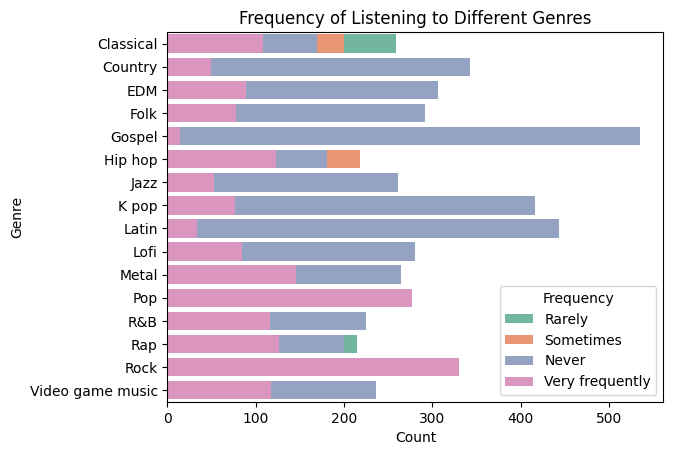

In [ ]:
# select only the columns that start with 'Frequency'
genre_col = [col for col in df.columns if col.startswith('Frequency')]

df_genre = df[genre_col]
df_genre

# reform the dataframe to have a single column for genre and a single column for frequency
df_genre = df_genre.melt(var_name='Genre', value_name='Frequency')

# remove the 'Frequency[]' prefix from the genre column
df_genre['Genre'] = df_genre['Genre'].str.replace('Frequency ', '').str.replace('[', '').str.replace(']', '')

df_genre

# stack count chart for frequency of listening to different genres
g = sns.countplot(y='Genre', data=df_genre, order=df_genre['Genre'].value_counts().index, hue='Frequency', dodge=False)
g.set_title('Frequency of Listening to Different Genres')
g.set_xlabel('Count')
g.set_ylabel('Genre')
plt.show()

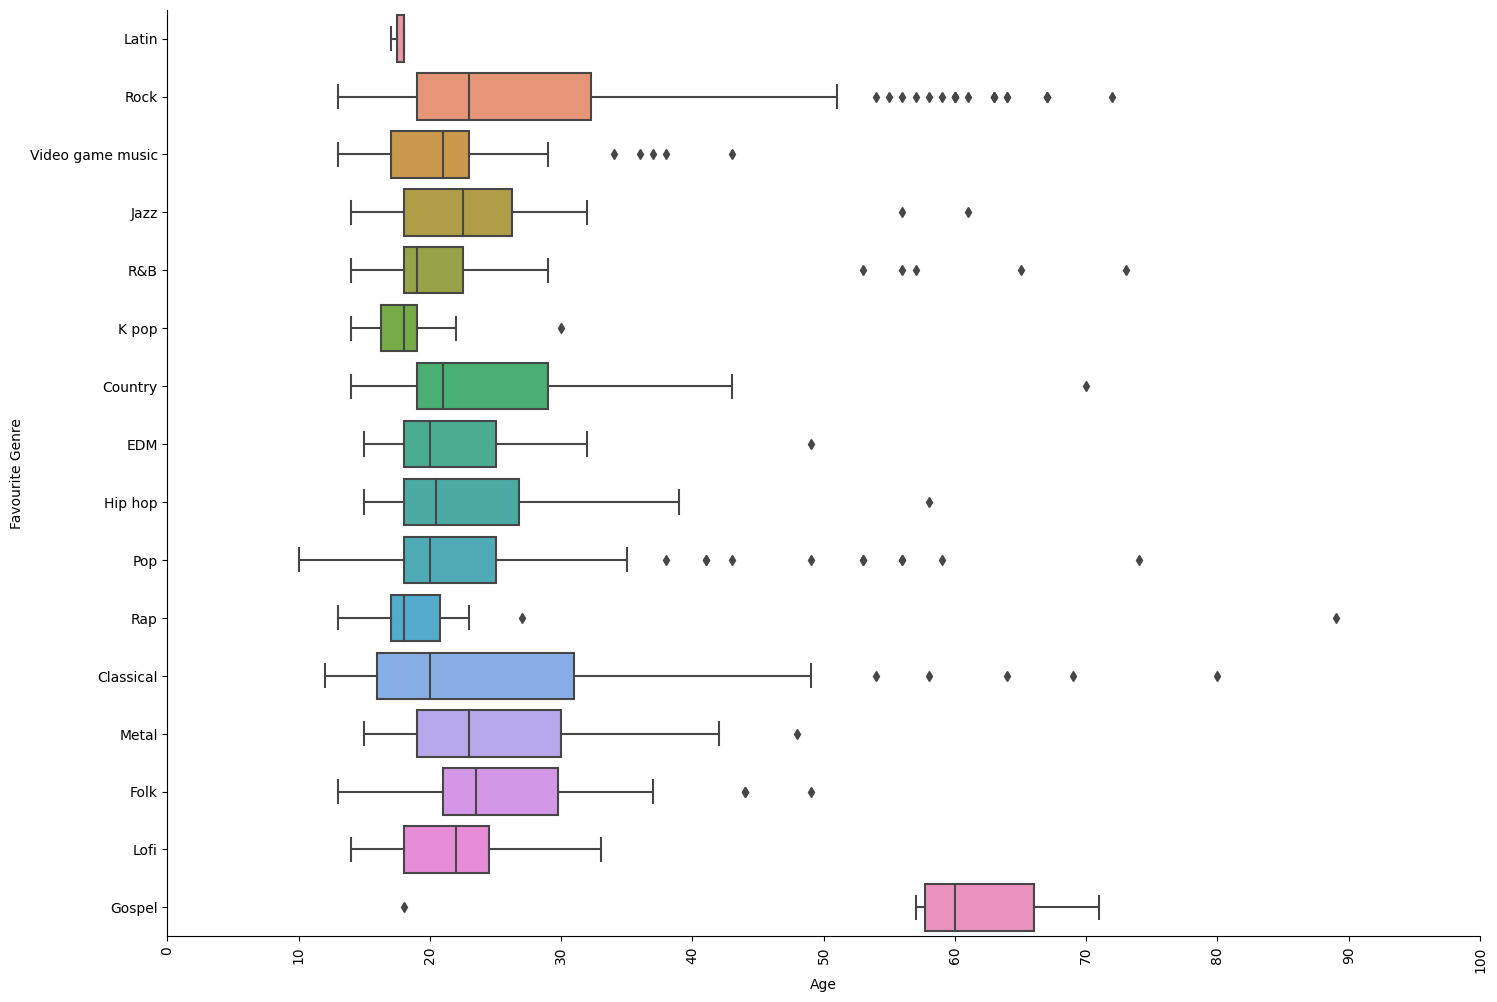

In [ ]:
# is there a relationship between age and genre preference?
g = sns.catplot(x='Age', y='Fav genre', data=df, kind='box', height=10, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set_xlabels('Age')
g.set_ylabels('Favourite Genre')
g.set_titles('Age vs Favourite Genre')
plt.show()

In [ ]:
# distribution of BPM
df['BPM'].describe()

count    6.290000e+02
mean     1.589948e+06
std      3.987261e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64

In [ ]:
# replace 1e9 with None in BPM column
df['BPM'] = df['BPM'].apply(lambda x: df['BPM'].median() if x > 500 else x)

# distribution of BPM
df['BPM'].describe()

count    629.000000
mean     122.616852
std       33.852120
min        0.000000
25%      100.000000
50%      120.000000
75%      143.000000
max      220.000000
Name: BPM, dtype: float64

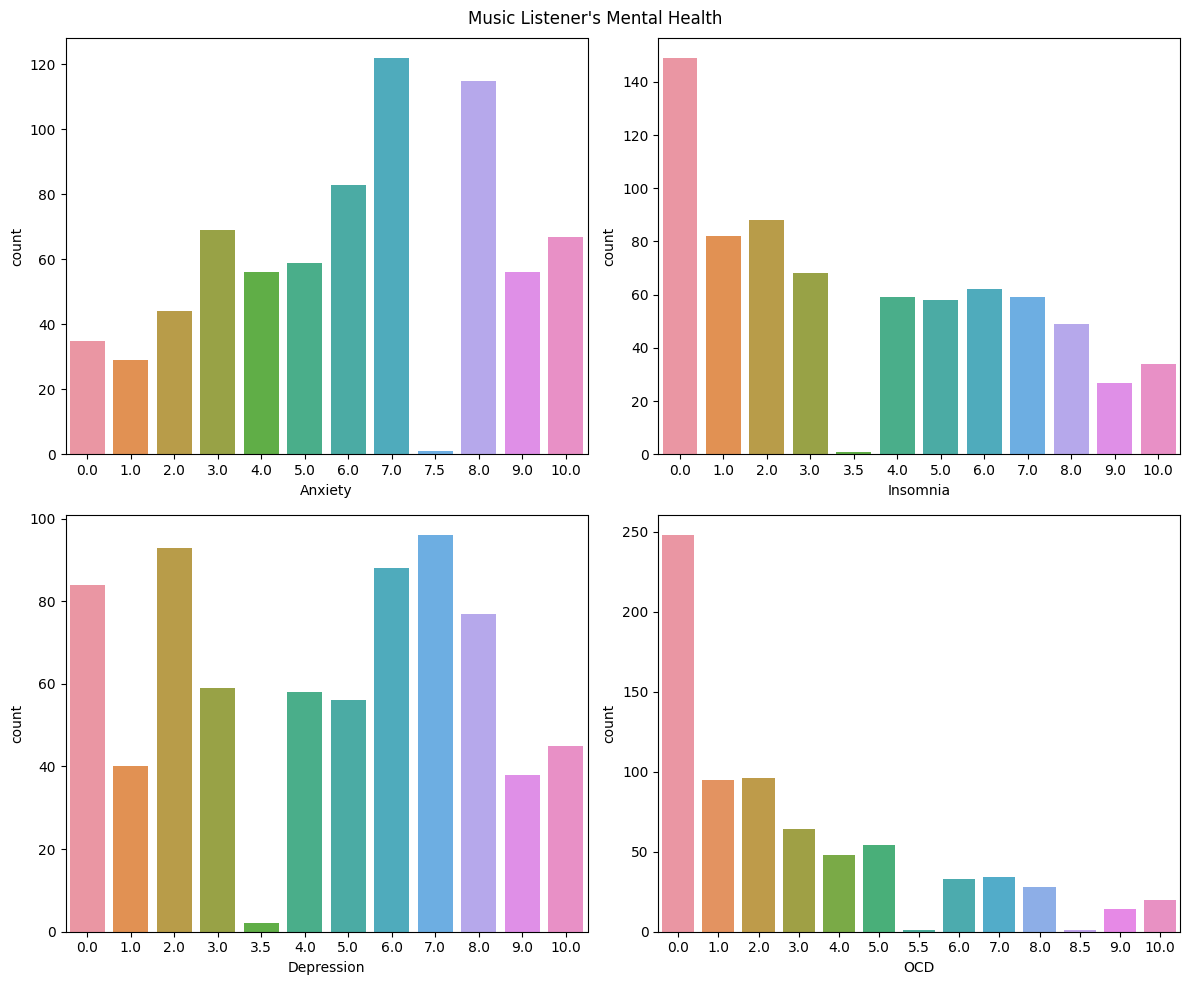

In [ ]:
# Anxiety, Depression, Insomnia, and OCD

fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
sns.countplot(x='Anxiety', data=df, ax=ax[0, 0])
sns.countplot(x='Depression', data=df, ax=ax[1, 0])
sns.countplot(x='Insomnia', data=df, ax=ax[0, 1])
sns.countplot(x='OCD', data=df, ax=ax[1, 1])

plt.suptitle("Music Listener's Mental Health")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Music Effects on Mental Health')

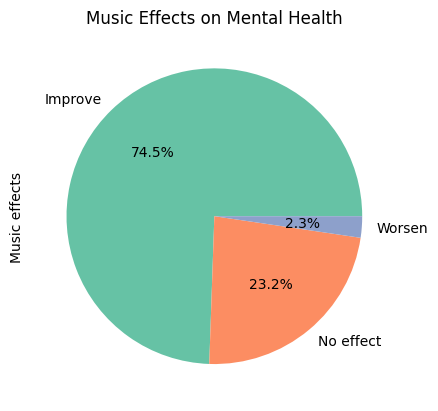

In [ ]:
# plot the pie chart of music effects
df['Music effects'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Music Effects on Mental Health')

<ipython-input-44-81729a21caf1>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_fav_genre = df_fav_genre.groupby(['Fav genre', 'Music effects']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')


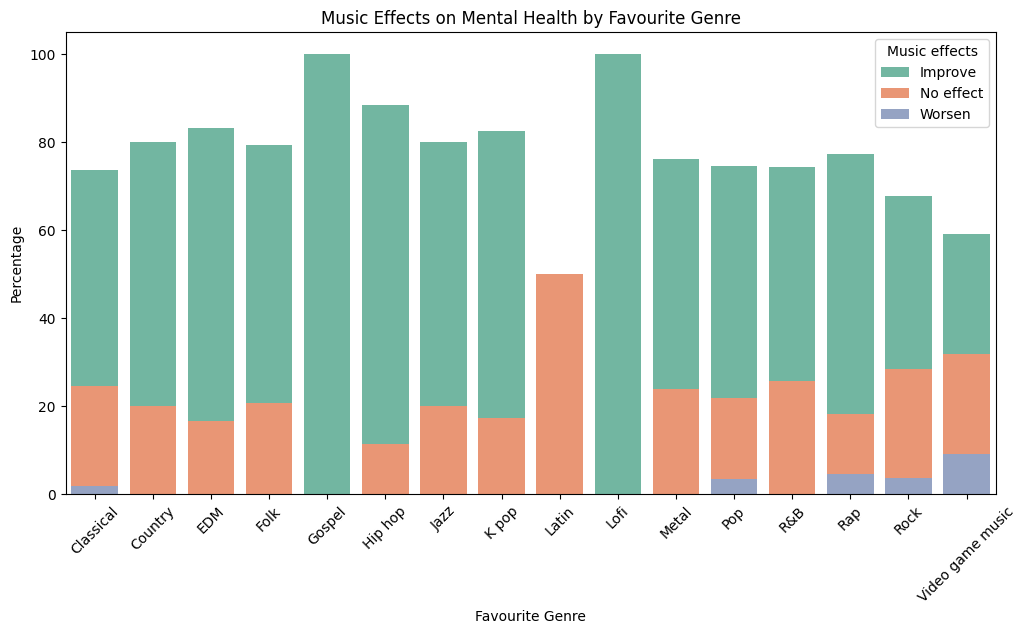

In [ ]:
# Which genre has the highest ratio of listeners who believe their fav genre has a positive effect on their mental health?

df_fav_genre = df[['Fav genre', 'Music effects']]

# normalize the counts
df_fav_genre = df_fav_genre.groupby(['Fav genre', 'Music effects']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='Percentage')

# plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Fav genre', y='Percentage', hue='Music effects', data=df_fav_genre, dodge=False, ax=ax)
ax.set_title('Music Effects on Mental Health by Favourite Genre')
ax.set_xlabel('Favourite Genre')
# tilt x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Percentage')
plt.show()

In [ ]:
# plot the correlation matrix heatmap

# encode the ordinal categorical variables in frequency columns

features_sel = ['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM',
                 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']

freq2num = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
df_genre = df[[col for col in df.columns if col.startswith('Frequency')]]
df_genre.replace(freq2num, inplace=True)

df_sel = pd.concat([df[features_sel], df_genre], axis=1)
df_sel.head()

<ipython-input-45-c8e3a3883fa1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre.replace(freq2num, inplace=True)


,Age,Hours per day,While working,Exploratory,BPM,Anxiety,Depression,Insomnia,OCD,Music effects,...,Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,18.0,3.0,Yes,Yes,156.0,3.0,0.0,1.0,0.0,NaN,...,0,3,3,1,0,3,2,3,0,2
1,63.0,1.5,Yes,Yes,119.0,7.0,2.0,2.0,1.0,NaN,...,3,1,2,1,0,2,2,1,3,1
2,18.0,4.0,No,No,132.0,7.0,7.0,10.0,2.0,No effect,...,1,3,0,2,2,1,0,1,1,3
3,61.0,2.5,Yes,Yes,84.0,9.0,7.0,3.0,3.0,Improve,...,3,2,3,2,0,2,2,0,0,0
4,18.0,4.0,Yes,Yes,107.0,7.0,2.0,5.0,9.0,Improve,...,0,3,2,2,0,2,3,3,0,1


In [ ]:
# encode th categorical variables into numerical values
df_sel['While working'] = df_sel['While working'].map({'Yes': 1, 'No': 0})
df_sel['Exploratory'] = df_sel['Exploratory'].map({'Yes': 1, 'No': 0})
df_sel['Music effects'] = df_sel['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

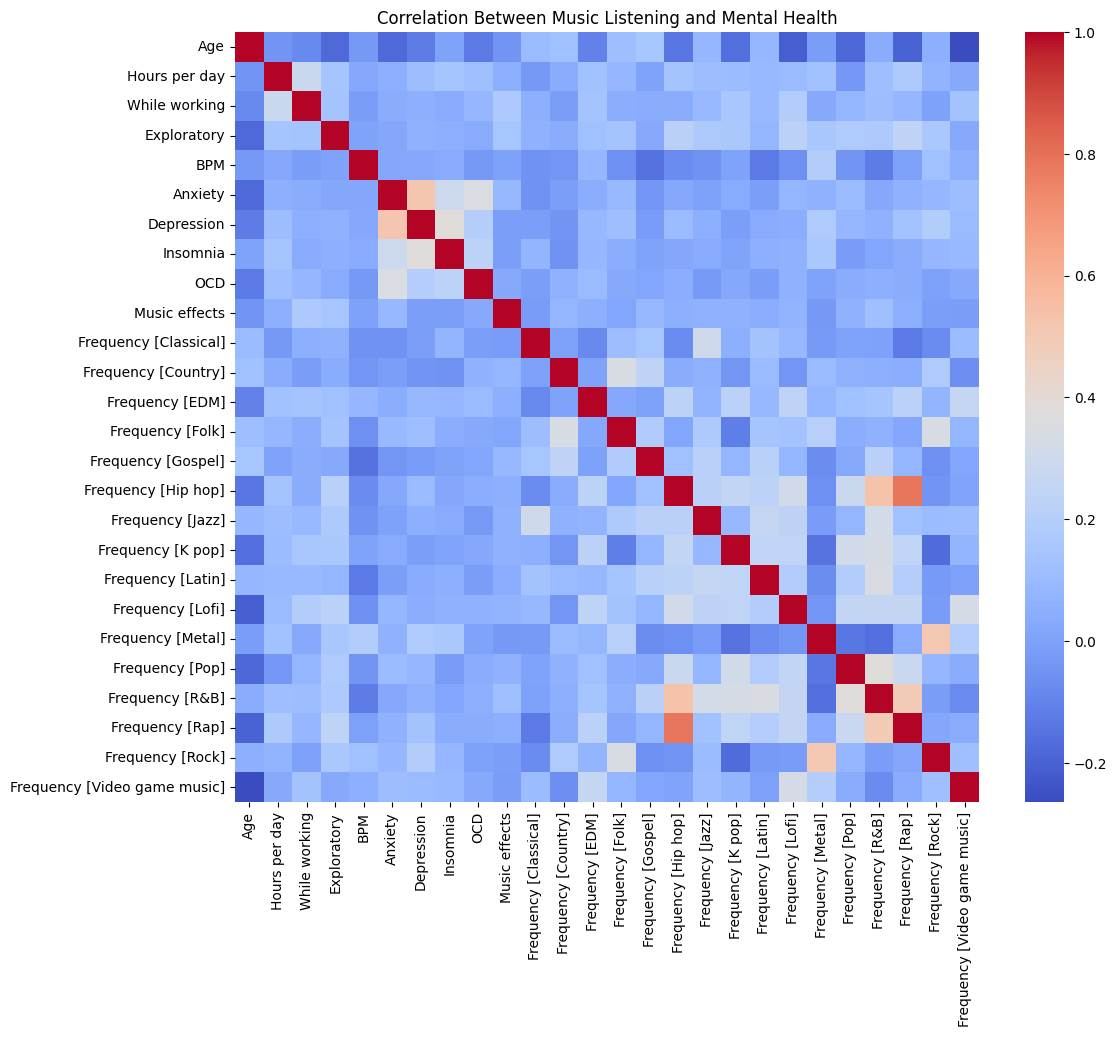

In [ ]:
# plot the correlation matrix heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df_sel.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Music Listening and Mental Health')
plt.show()